<a href="https://colab.research.google.com/github/itchyfeet-patient/Beautiful-Exploration/blob/master/Exploration_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자 ✌✊🖐

## (1) 라이브러리 버전을 확인해 보자!

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## (2) 데이터를 준비하자!

In [ ]:
# cd /content/drive/MyDrive/dataset/rock_scissor_paper/paper
# !unzip paper.zip
# cd /content/drive/MyDrive/dataset/rock_scissor_paper/rock
# !unzip rock.zip
# cd /content/drive/MyDrive/dataset/rock_scissor_paper/scissor
# !unzip scissor.zip

In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/combine/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!


In [ ]:
# 바위
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/combine/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
바위 이미지 resize 완료!


In [ ]:
# 보
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/combine/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
보 이미지 resize 완료!


가위바위보 이미지 resize 완료!

In [ ]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/combine_origin_real/'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 224, 224, 3)
y_train shape: (900,)


이미지 정규화, 라벨링 완료!

라벨:  0


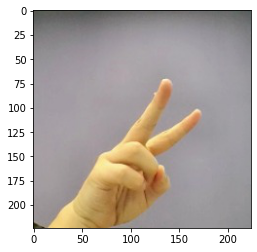

In [ ]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

이미지 확인 완료! (저게 과연 가위인가..?)

In [ ]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

y_train_reshaped = y_train.reshape(-1, 28,28,3)
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (900, 224, 224, 3)
Before Reshape - x_test_norm shape: (900, 224, 224, 3)


ValueError: ignored

### 테스트테스트

In [ ]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/combine_origin_real/'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_train_reshaped=x_train_norm.reshape( -1, 224, 224, 3)

print("x_train shape: {}".format(x_train_reshaped.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 224, 224, 3)
y_train shape: (900,)


이미지 정규화, 라벨링 완료!

라벨:  0


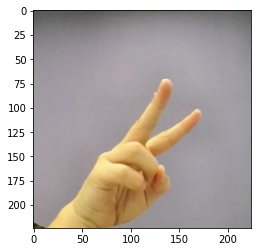

In [ ]:
plt.imshow(x_train_reshaped[0])
print('라벨: ', y_train[0])

## (3) 딥러닝 네트워크 설계하자!

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=1024
n_channel_2=1024
n_channel_3=1024
n_channel_4=1024

drop_rate = 0.4
n_dense=256
n_train_epoch=40


# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(drop_rate))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(drop_rate))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  9
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 222, 222, 1024)    28672     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 111, 111, 1024)   0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 111, 111, 1024)    0         
                                                                 
 conv2d_32 (Conv2D)          (None, 109, 109, 1024)    9438208   
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 54, 54, 1024)     0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        

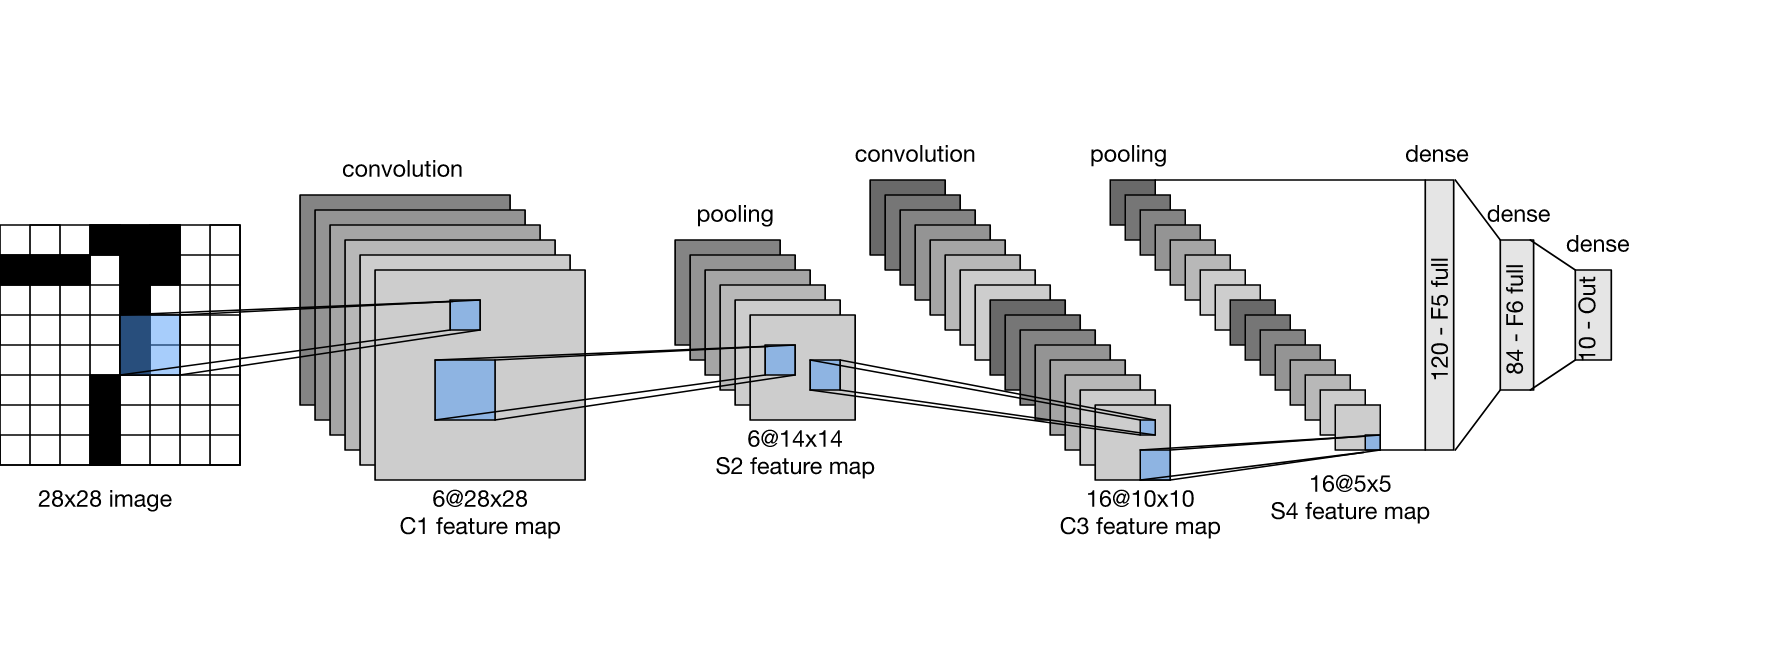

Lenet의 구조  
http://d2l.ai/chapter_convolutional-neural-networks/lenet.html

### 테스트


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=512
n_channel_2=512
n_channel_3=1024
n_channel_4=1024

drop_rate = 0.3
n_dense=256
n_train_epoch=40


# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(drop_rate))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(drop_rate))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  9
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 512)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 512)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 512)     2359808   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 512)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (No

## (4) 딥러닝 네트워크 학습시키자!

In [ ]:
print(x_train.shape)

(900, 224, 224, 3)


In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

ValueError: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(x_train, y_train, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

RuntimeError: ignored

### 테스트

In [ ]:
print(x_train_reshaped.shape)

(900, 224, 224, 3)


In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
29/29 [==============================] - 25s 415ms/step - loss: 3.8702 - accuracy: 0.3667
Epoch 2/10
29/29 [==============================] - 11s 393ms/step - loss: 0.6721 - accuracy: 0.7222
Epoch 3/10
29/29 [==============================] - 11s 393ms/step - loss: 0.4067 - accuracy: 0.8467
Epoch 4/10
29/29 [==============================] - 11s 393ms/step - loss: 0.1910 - accuracy: 0.9378
Epoch 5/10
29/29 [==============================] - 11s 393ms/step - loss: 0.1578 - accuracy: 0.9433
Epoch 6/10
29/29 [==============================] - 11s 394ms/step - loss: 0.1060 - accuracy: 0.9633
Epoch 7/10
29/29 [==============================] - 11s 393ms/step - loss: 0.0774 - accuracy: 0.9689
Epoch 8/10
29/29 [==============================] - 11s 393ms/step - loss: 0.0566 - accuracy: 0.9811
Epoch 9/10
29/29 [==============================] - 11s 393ms/step - loss: 0.0579 - accuracy: 0.9789
Epoch 10/10
29/29 [==============================] - 11s 394ms/step - loss: 0.0787 - accura

In [ ]:
test_loss, test_accuracy = model.evaluate(x_train_reshaped, y_train, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 4s - loss: 0.0283 - accuracy: 0.9867 - 4s/epoch - 140ms/step
test_loss: 0.028315763920545578 
test_accuracy: 0.9866666793823242


## (5) 얼마나 잘 만들었는지 확인하자! (테스트)

LMS의 테스트 데이터를 test 데이터로 가져왔습니다.

In [ ]:
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/test/rock'
resize_images(image_dir_path)
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/test/scissor'
resize_images(image_dir_path)
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/test/paper'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


테스트용 데이터 x_test, y_test 만들기

In [ ]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/test_origin/'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화23

x_train_reshaped=x_train_norm.reshape( -1, 224, 224, 3)

print("x_train shape: {}".format(x_train_reshaped.shape))
print("y_train shape: {}".format(y_train.shape))


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (900, 224, 224, 3)
y_test shape: (900,)


라벨:  0


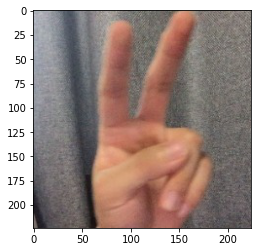

In [ ]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.



In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

RuntimeError: ignored

78%네요..!?

### 테스트


테스트용 데이터 x_test, y_test 만들기

In [ ]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_paper/test_origin/'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_reshaped=x_test_norm.reshape( -1, 224, 224, 3)

print("x_test shape: {}".format(x_test_reshaped.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 224, 224, 3)
y_test shape: (300,)


라벨:  0


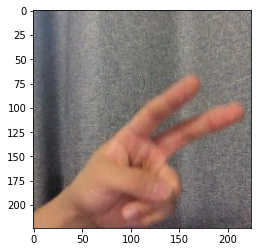

In [ ]:
plt.imshow(x_test_reshaped[0])
print('라벨: ', y_test[0])

테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.



In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 2.0336 - accuracy: 0.4500 - 2s/epoch - 189ms/step
test_loss: 2.0335533618927 
test_accuracy: 0.44999998807907104


## (6) 더 좋은 네트워크 만들어보자!

틀린문제 보자!

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.86315376 0.02395191 0.11289433]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


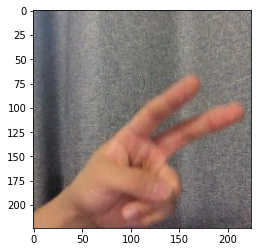

In [ ]:
plt.imshow(x_test_reshaped[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.00159335 0.00667971 0.991727  ]
라벨: 1, 예측결과: 2


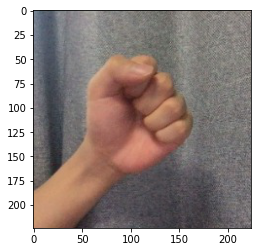

예측확률분포: [0.00318928 0.01005862 0.98675215]
라벨: 0, 예측결과: 2


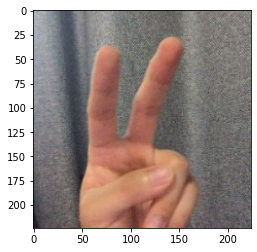

예측확률분포: [0.01953856 0.02115838 0.959303  ]
라벨: 1, 예측결과: 2


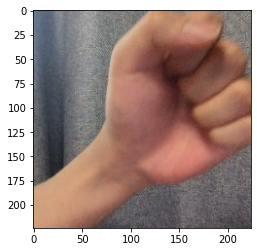

예측확률분포: [0.01066191 0.02175408 0.967584  ]
라벨: 1, 예측결과: 2


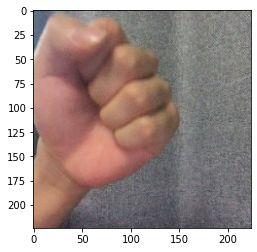

예측확률분포: [0.00091243 0.11332594 0.8857616 ]
라벨: 1, 예측결과: 2


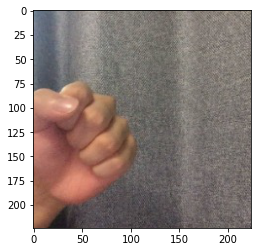

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test_reshaped[n], cmap=plt.cm.binary)
    plt.show()

엉망진창?!

하이퍼파라미터 튜닝해보자!

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=512
n_channel_2=512
n_channel_3=512
n_channel_4=512

drop_rate = 0.3
n_dense=256
n_train_epoch=100

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (1,1), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu'))
model.add(keras.layers.AveragePooling2D((2,2)))

model.add(keras.layers.Conv2D(n_channel_3, (2,2), activation='relu'))
model.add(keras.layers.AveragePooling2D((2,2)))
model.add(keras.layers.Dropout(drop_rate))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))

model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 512)     2048      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 512)    0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 111, 111, 512)     1049088   
                                                                 
 average_pooling2d_2 (Averag  (None, 55, 55, 512)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 54, 54, 512)       1049088   
                                                                 
 average_pooling2d_3 (Averag  (None, 27, 27, 512)     

**80%를 넘었다!!** (재현님 보고계시죠?)

### 테스트

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=512
n_channel_2=512
n_channel_3=512

drop_rate = 0.2
n_dense=512
n_train_epoch=100

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (2,2), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu'))
model.add(keras.layers.AveragePooling2D((2,2)))

model.add(keras.layers.Conv2D(n_channel_3, (2,2), activation='relu'))
model.add(keras.layers.AveragePooling2D((2,2)))
model.add(keras.layers.Dropout(drop_rate))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))

model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 31, 31, 512)       6656      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 512)      0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 512)       1049088   
                                                                 
 average_pooling2d_8 (Averag  (None, 7, 7, 512)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_16 (Conv2D)          (None, 6, 6, 512)         1049088   
                                                                 
 average_pooling2d_9 (Averag  (None, 3, 3, 512)       

## 🎯 평가 루브릭

| **평가문항** | **상세기준** | **학습결과** |
|---|---|:---:|
| 1. 이미지 분류기 모델이 성공적으로 만들어졌는가? | 트레이닝이 정상적으로 수행되었음 | O |
| 2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가? | 데이터셋의 다양성, 정규화 등의 시도가 적절하였음 | O |
| 3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가? | 60% 이상 도달하였음 |  test accuracy : 88.22% |

# ✍ 회고

노드 첫날 회고  
1. 내가 직접 찍은 데이터셋으로 모델에 학습시켜보니... 쉽지않다..!
2. 정제된 데이터가 아닌 데이터를 사용하다 보니 정확도가 떨어지는 것일까?  
    내가 찍은 이미지는 좀 배경이 깔끔하지 못했는데, test 데이터로 사용한 성보님의 데이터는 비교적 깔끔한 배경에서 촬영한 것이라 모델 학습 정확도에는 **이미지의 배경과 조명에도 영향을 받는다**는 점을 알 수 있었다.
3. 각 하이퍼 파라미터 값을 변화시켜 보면서..  
    - n_channel(Conv2D)계층의 숫자, 그러니까 얼마나 다양한 이미지의 특징을 살펴볼 것인지 이 숫자를 높이면 높일수록 좋을 것이라고 생각했는데 꼭 그렇지만도 않았다.
    - Dense Layer 숫자, 그러니까 분류기 알고리즘을 얼마나 복잡하게 할 것인가? 이것도 적당히 높아야 하구나..... 
4. 이제 막 배우기 시작한 단계라 relu함수와 softmax함수를 보고 마지막 출력층에 softmax함수가 나오는구나! 하이퍼 파라미터 값은 어떻게 만져야 좋을까.. 하는 깨달음과 궁금증이 생긴다. 
5. 근데 할때마다 accuracy가 달라져서 이게맞나 싶음..

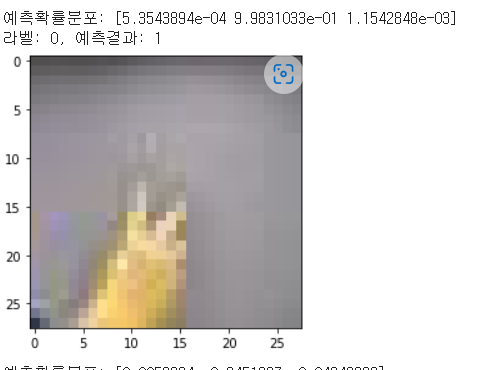

- 위 사진을 보면 가위를 주먹으로 인식했는데.. 내가 생각해도 좀 주먹같긴함...;;;
- 이렇게 resize 하는 과정에서 화질이 저하되면서 인식률이 낮아진 것 같기도 하다? 내 train 데이터를 성보님께 드렸는데 내 웹캠 화질이 난리나서 솔직히 분류하는 게 기적인 느낌? (애도 🙏 )

---
몇일 뒤...
- 같은 조원들의 데이터를 tr 데이터로 사용하면 더욱 잘 학습하여 테스트 데이터의 인식률을 높일 수 있다는 재현님의 지도로 한 번 **tr데이터를 합쳐보았다**! 그 결과로 80% 이상의 인식률(정확도)를 얻었다. **배경을 다양하게 학습시키니까** 인식률이 높아진 것으로 보인다. 역시 강하게 키운 모델이 test 데이터에도 강하다..?
---
3일 뒤...  
- 재현님이 95% 만들어보자고 하셔서 resize 하지 않은 224*224 이미지를 사용해서 데이터의 양을 늘려봤다. 그런데 그 과정에 테스트데이터 불러오는 함수를 잘못 쓴 줄도 모르고 결과가 11% 이렇게 나와서 멘붕 3일..   
    데이터셋에 문제있는 줄 알고 업로드를 몇 번 했는지.. 이번달 최대의 헛짓거리다   
    (꿈에도 나옴 막 테스트데이터 어느부분이 잘못됐다 이러면서 잠에서 깸; 🛌 )
- 224 * 224 데이터를 쓰니 채널도 많이 만들어야 할 것 같고 막 1000개씩 무지성으로 넣었는데 파라미터가 너무 많아진 탓인지 오류나고..   
    겨우겨우 실행되는것도 에포크마다 정확도 **33%**씩 되고 최종 정확도도 **33%**고.. **33**의 저주일까? 진짜 힘들었는데...
- 레이어 많이 쌓고 n_channel 1024씩 하다가 확 레이어도 3층으로 줄이고 n_channel도 64 이렇게 바꾸니까.. 오히려 빨라지고 정확도도 소폭 상승함. 뭘까? 진짜... 알고싶다.. 내가 생각한 메커니즘이 아니었나보다.
- 요령이 생겨가지고 하이퍼파라미터 바꿀 때 조금씩 바꾸면서 실행해보고 조절한ㄷㅏ.. 이게 사실 맞는거지... 

### 참고문헌  
dropout : https://limitsinx.tistory.com/60  
파라미터가 많으면 안좋은 이유 : https://89douner.tistory.com/55?category=873854  
CNN 하이퍼 파라미터 의미 : https://warm-uk.tistory.com/47